# Projeto 3

Dados Happiness Alcohol Consumption

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D

In [89]:
dados = pd.read_excel("HappinessAlcoholConsumption.xls")

In [17]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [21]:
quant = dados[["HappinessScore", "HDI", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]]

In [71]:
#quant.describe()

# HappinessScore

In [74]:
Y = dados["HappinessScore"]
X = dados[["HDI", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]]

results = regress(X,Y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     48.55
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           7.05e-27
Time:                        07:13:49   Log-Likelihood:                -120.66
No. Observations:                 122   AIC:                             253.3
Df Residuals:                     116   BIC:                             270.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4899      0.461      1.063      0.290      -0.423       1.403
HDI                  0.0069      0.001     10.196      0.000       0.006       0.008
GDP_PerCapita        0.0002      0.000      0.672      0.503      -0.000       0.001
Beer_PerCapita       0.0007      0.001      0.912      0.363      -0.001       0.002
Spirit_PerCapita    -0.0014      0.001     -1.655      0.101      -0.003       0.000
Wine_PerCapita      -0.0014      0.001     -1.471      0.144      -0.003       0.000
==============================================================================
Omnibus:                        5.197   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                3.098
Skew:                          -0.185   Prob(JB):                        0.212
Kurtosis:                       2.312   Cond. No.                     5.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
X3 = dados[["HDI", "Spirit_PerCapita", "Wine_PerCapita"]]
results3 = regress(X3, Y)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         HappinessScore   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     81.08
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.54e-28
Time:                        14:07:08   Log-Likelihood:                -121.28
No. Observations:                 122   AIC:                             250.6
Df Residuals:                     118   BIC:                             261.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6147      0.357      1.722      0.088      -0.092       1.321
HDI                  0.0069      0.001     12.442      0.000       0.006       0.008
Spirit_PerCapita    -0.0012      0.001     -1.505      0.135      -0.003       0.000
Wine_PerCapita      -0.0010      0.001     -1.197      0.234      -0.003       0.001
==============================================================================
Omnibus:                        5.276   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.230
Skew:                          -0.205   Prob(JB):                        0.199
Kurtosis:                       2.317   Cond. No.                     4.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
c = results3.params["const"]
w = results3.params["GDP_PerCapita"]
y = results3.params["Beer_PerCapita"]

In [29]:
def f(GDP, Beer):
    return c+w*GDP + y*Beer

In [30]:
npoints = 100
GDP = np.linspace(X3["GDP_PerCapita"].min(), X3["GDP_PerCapita"].max(), npoints)
Beer = np.linspace(X3["Beer_PerCapita"].min(), X3["Beer_PerCapita"].max(), npoints)

In [31]:
GDP_xx, Beer_yy = np.meshgrid(GDP, Beer)

In [32]:
z = f(GDP_xx, Beer_yy)

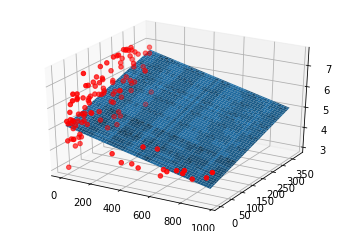

In [34]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(GDP_xx, Beer_yy, z)
plt3d.scatter(X3["GDP_PerCapita"],X3["Beer_PerCapita"], Y , color="r");

# HDI

In [60]:
Y1 = dados["HDI"]
X1 = dados[["HappinessScore", "GDP_PerCapita", "Beer_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]]

results = regress(X1,Y1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           1.22e-40
Time:                        18:06:18   Log-Likelihood:                -681.30
No. Observations:                 122   AIC:                             1375.
Df Residuals:                     116   BIC:                             1391.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              309.2889     35.785      8.643      0.000     238.413     380.165
HappinessScore      68.0812      6.677     10.196      0.000      54.856      81.307
GDP_PerCapita       -0.1579      0.033     -4.783      0.000      -0.223      -0.093
Beer_PerCapita       0.0942      0.074      1.274      0.205      -0.052       0.241
Spirit_PerCapita     0.2674      0.080      3.323      0.001       0.108       0.427
Wine_PerCapita       0.4671      0.081      5.749      0.000       0.306       0.628
==============================================================================
Omnibus:                        0.071   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.965   Jarque-Bera (JB):                0.219
Skew:                           0.027   Prob(JB):                        0.896
Kurtosis:                       2.800   Cond. No.                     1.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
X3_ = dados[["HappinessScore", "GDP_PerCapita", "Spirit_PerCapita", "Wine_PerCapita"]]
results3 = regress(X3_, Y1)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     125.5
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           2.27e-41
Time:                        14:06:22   Log-Likelihood:                -682.15
No. Observations:                 122   AIC:                             1374.
Df Residuals:                     117   BIC:                             1388.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              307.0341     35.836      8.568      0.000     236.063     378.005
HappinessScore      70.0293      6.517     10.745      0.000      57.122      82.936
GDP_PerCapita       -0.1647      0.033     -5.041      0.000      -0.229      -0.100
Spirit_PerCapita     0.2955      0.078      3.807      0.000       0.142       0.449
Wine_PerCapita       0.5025      0.077      6.564      0.000       0.351       0.654
==============================================================================
Omnibus:                        0.192   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.334
Skew:                          -0.075   Prob(JB):                        0.846
Kurtosis:                       2.792   Cond. No.                     1.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
c = results3.params["const"]
w = results3.params["Spirit_PerCapita"]
y1 = results3.params["Beer_PerCapita"]

KeyError: 'Beer_PerCapita'

In [ ]:
def f(Spirit, Beer):
    return c+w*Spirit + y1*Beer

In [ ]:
npoints = 100
Spirit = np.linspace(X3_["Spirit_PerCapita"].min(), X3_["Spirit_PerCapita"].max(), npoints)
Beer = np.linspace(X3_["Beer_PerCapita"].min(), X3_["Beer_PerCapita"].max(), npoints)

KeyError: 'Beer_PerCapita'

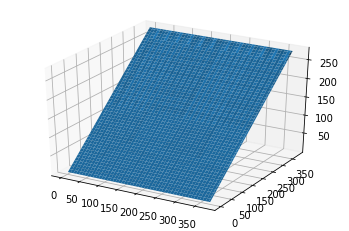

In [87]:
Spirit_xx, Beer_yy = np.meshgrid(Spirit, Beer)

z = f(Spirit_xx, Beer_yy)

plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(Spirit_xx, Beer_yy, z)
plt3d.scatter(X3_["Spirit_PerCapita"],X3_["Beer_PerCapita"], Y1 , color="r");